高い正解率を目指していく

In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)

In [2]:
X, Y = mnist['data'], mnist['target']
print(X.shape, Y.shape)

(70000, 784) (70000,)


In [3]:
first_element = X.loc[0].values
first_element_image = first_element.reshape(28, 28)
first_element_image

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0

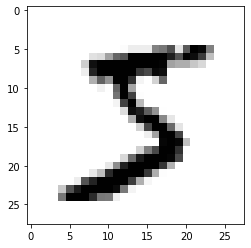

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(first_element_image, cmap="binary")
plt.show()

In [5]:
Y[0]

'5'

In [6]:
import numpy as np
Y = Y.astype(np.uint8)
Y[0]

5

データの分割

In [7]:
X_train, X_test, Y_train, Y_test = X[:60000], X[60000:], Y[:60000], Y[60000:]

In [8]:
X_train.shape, Y_train.shape

((60000, 784), (60000,))

データの観察

In [9]:
X_train.loc[0].describe()

count    784.000000
mean      35.108418
std       79.699674
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max      255.000000
Name: 0, dtype: float64

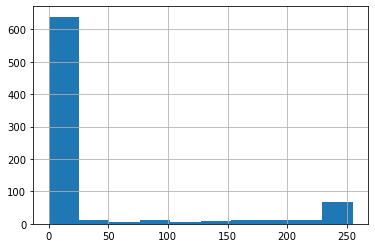

In [10]:
X_train.loc[0].hist()
plt.show()

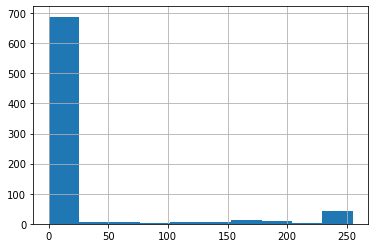

In [11]:
X_train.loc[133].hist()
plt.show()

In [12]:
#X_train_transposed = X_train.transpose()
#X_train_transposed.describe()

正規化を試みる

In [13]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
X_train_minmax_scaled = min_max_scaler.fit_transform(X_train.astype(np.float64))
X_train_minmax_scaled

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [14]:
import pandas as pd

X_train_minmax_scaled = pd.DataFrame(X_train_minmax_scaled)
#X_train_minmax_scaled.transpose().describe()

標準化処理も書いて置く

In [15]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
X_train_standard_scaled = standard_scaler.fit_transform(X_train.astype(np.float64))

X_train_standard_scaled = pd.DataFrame(X_train_standard_scaled)
#X_train_standard_scaled.transpose().describe()

色んなモデルを試してみる。時間かかるけど

In [16]:
#SGD
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
#sgd_clf.fit(X_train_minmax_scaled, Y_train)

from sklearn.model_selection import cross_val_score

#sgd_minmax_score = cross_val_score(sgd_clf, X_train_minmax_scaled,
                                   #Y_train, cv=3, scoring="accuracy")

In [17]:
#sgd_minmax_score.mean()
sgd_minmax_score_mean = 0.9105333333333333

In [18]:
#sgd_standard_score = cross_val_score(sgd_clf, X_train_standard_scaled,
                                    # Y_train, cv=3, scoring="accuracy")

#sgd_standard_score
sgd_standard_score_mean = 0.8970333333333333

In [19]:
#sgd_standard_score.mean()

In [20]:
#ランダムフォレスト
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)

#forest_minmax_score = cross_val_score(forest_clf, X_train_minmax_scaled,
                                      #Y_train, cv=3, scoring="accuracy")

#forest_minmax_score.mean()
forest_minmax_score_mean = 0.9646

In [21]:
#forest_standard_score = cross_val_score(forest_clf, X_train_standard_scaled,
                                       # Y_train, cv=3, scoring="accuracy")

forest_standard_score_mean = 0.9644833333333334

In [22]:
#SVM
from sklearn.svm import SVC

svm_clf = SVC()

#svm_minmax_score = cross_val_score(svm_clf, X_train_minmax_scaled,
                                  # Y_train, cv=3, scoring="accuracy")

#svm_minmax_score.mean()
svm_minmax_score_mean = 0.9749

In [23]:
#svm_standard_score = cross_val_score(svm_clf, X_train_standard_scaled,
                                    # Y_train, cv=3, scoring="accuracy")

#svm_standard_score.mean()
svm_standard_score_mean = 0.9602666666666666

In [24]:
#k近傍法
from sklearn.neighbors import KNeighborsClassifier

kN_clf = KNeighborsClassifier()

#kN_minmax_score = cross_val_score(kN_clf, X_train_minmax_scaled,
                                 # Y_train, cv=3, scoring="accuracy")

kN_minmax_score_mean = 0.9674333333333333

0.9674333333333333

In [25]:
#kN_standard_score = cross_val_score(kN_clf, X_train_standard_scaled,
                                    #Y_train, cv=3, scoring="accuracy")

kN_standard_score_mean = 0.9403666666666667

0.9403666666666667

In [26]:
#lightGBMにインスパイアされてできたっていうモデルも使ってみる
from sklearn.ensemble import HistGradientBoostingClassifier

histGB_clf = HistGradientBoostingClassifier(random_state=42)

#histGB_minmax_score = cross_val_score(histGB_clf, X_train_minmax_scaled,
                                      # Y_train, cv=3, scoring="accuracy")

histGB_minmax_score_mean = 0.9733999999999999

0.9733999999999999

In [30]:
#histGB_standard_score = cross_val_score(histGB_clf, X_train_standard_scaled,
                                       # Y_train, cv=3, scoring="accuracy")

histGB_standard_score_mean = 0.9733999999999999

0.9733999999999999

一番精度の良かったSVMでグリッドサーチを行う

In [ ]:
from sklearn.model_selection import GridSearchCV

svc_grid = [
    {
     'C': [10 ** x for x in range(-5, 6)],
     'kernel': ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
     'decision_function_shape': ['ovo', 'ovr'],
    }
]

svc_grid_search = GridSearchCV(svm_clf, svc_grid, cv=3,
                               scoring='neg_mean_squared_error',
                               return_train_score=True)

svc_grid_search.fit(X_train_minmax_scaled, Y_train)

svc_best_param = SVC_grid_search.best_params_
svc_best_param